# Projeto 2 - Estudo de Caso: Titanic

Notebook de testes.

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
print(f'O Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O Dataset possui 891 linhas e 12 colunas.


**Ponto**

* PassengerId poderia ser índice do DataFrame

In [146]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Precisamos entender melhor do que se trata cada atributo
# Por enquanto, vejamos alguns dados adicionais

print(f'Quantidade de linhas: {df.shape[0]}\nQuantidade de colunas: {df.shape[1]}')

Quantidade de linhas: 891
Quantidade de colunas: 12


In [153]:
# Há dados faltantes?
df.isnull().values.any()

True

In [154]:
# Contabilizando
df.isnull().values.sum()

689

In [5]:
# Infos adicionais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Ponto**:
* Age, Cabin e Embarked possuem dados nulos. Entender os motivos e definir se vale a pena excluir,

In [6]:
# Estatísticas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Entender o que é SibSP e Parch

In [8]:
# Mudando indice
df.set_index('PassengerId', inplace=True)

In [164]:
# Dados duplicados
df.duplicated().any()

False

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Qual a idade média dos sobreviventes?**

In [11]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [13]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [14]:
df.groupby('Survived').count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


In [16]:
100 * 342/(342+549)

38.38383838383838

In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df.groupby(['Embarked', 'Survived']).count()['Name']

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Name, dtype: int64

In [30]:
df.groupby(['Embarked', 'Survived']).count()['Name']['C']

Survived
0    75
1    93
Name: Name, dtype: int64

In [31]:
# Taxa de sobreviventes por classe
print('C')

C


In [39]:
c = df.groupby(['Embarked', 'Survived']).count()['Name']['C']
q = df.groupby(['Embarked', 'Survived']).count()['Name']['Q']
s = df.groupby(['Embarked', 'Survived']).count()['Name']['S']

In [42]:
tc = 100 * c[1] / c.sum()
tq = 100 * q[1] / q.sum()
ts = 100 * s[1] / s.sum()

In [43]:
print('Taxa de sobreviventes por classe')
print(f'C: {tc:.2f}%')
print(f'Q: {tq:.2f}%')
print(f'S: {ts:.2f}%')

Taxa de sobreviventes por classe
C: 55.36%
Q: 38.96%
S: 33.70%


In [44]:
# Visualizando novamente
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [47]:
idade_surv = df.groupby('Survived').mean()['Age'][1]

In [49]:
# Média de idade de sobreviventes
print(f'A média de idade dos sobreviventes foi de {int(idade_surv)} anos.')

A média de idade dos sobreviventes foi de 28 anos.


In [50]:
df.groupby('Survived').count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


In [54]:
# O que seria PClass? Talvez não seja EMBARKED
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [56]:
df.groupby(['Pclass', 'Survived']).count()

Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass Survived                                                             
1      0           80   80   64     80     80      80    80     59        80
       1          136  136  122    136    136     136   136    117       134
2      0           97   97   90     97     97      97    97      3        97
       1           87   87   83     87     87      87    87     13        87
3      0          372  372  270    372    372     372   372      6       372
       1          119  119   85    119    119     119   119      6       119

In [64]:
df.groupby(['Pclass', 'Survived']).count()['Name']

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Name, dtype: int64

In [65]:
df.groupby(['Pclass', 'Survived']).count()['Name'][1]

Survived
0     80
1    136
Name: Name, dtype: int64

In [68]:
# Agora sim, calculando taxa de sobreviventes de acordo com a Classe
classe_1 = df.groupby(['Pclass', 'Survived']).count()['Name'][1]
classe_2 = df.groupby(['Pclass', 'Survived']).count()['Name'][2]
classe_3 = df.groupby(['Pclass', 'Survived']).count()['Name'][3]

taxa_1 = 100 *  classe_1[1] / classe_1.sum()
taxa_2 = 100 * classe_2[1] / classe_2.sum()
taxa_3 = 100 * classe_3[1] / classe_3.sum()

In [69]:
# Comunicando
print(f'Taxa de sobreviventes da Classe 1: {taxa_1:.2f}%')
print(f'Taxa de sobreviventes da Classe 2: {taxa_2:.2f}%')
print(f'Taxa de sobreviventes da Classe 3: {taxa_3:.2f}%')

Taxa de sobreviventes da Classe 1: 62.96%
Taxa de sobreviventes da Classe 2: 47.28%
Taxa de sobreviventes da Classe 3: 24.24%


In [70]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
# Verificar média de idades por classe
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


Mais velhos - mais ricos - classes melhores

Fare deve ser algo relacionado aos ganhos financeiros

In [73]:
# Parece que todos da Classe 3 possuem Cabin = NaN?
df_c3 = df.query('Pclass == 3')

In [74]:
df_c3.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [75]:
df_c3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 1 to 891
Data columns (total 11 columns):
Survived    491 non-null int64
Pclass      491 non-null int64
Name        491 non-null object
Sex         491 non-null object
Age         355 non-null float64
SibSp       491 non-null int64
Parch       491 non-null int64
Ticket      491 non-null object
Fare        491 non-null float64
Cabin       12 non-null object
Embarked    491 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 46.0+ KB


Apenas 12 valores preenchidos para Cabin.

Tarefa futura. Verificar a porcentagem de homens e mulheres por cada uma das classes. Acho que é melhor por groupby. Principalmente para plotar gráficos.

In [76]:
df_c3.groupby('Sex').count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,144,144,144,102,144,144,144,144,6,144
male,347,347,347,253,347,347,347,347,6,347


Calculando taxa de sobreviventes por classe e sexo.

In [93]:
df.groupby(['Pclass', 'Survived', 'Sex']).count()

Name  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass Survived Sex                                                           
1      0        female     3    3      3      3       3     3      3         3
                male      77   61     77     77      77    77     56        77
       1        female    91   82     91     91      91    91     78        89
                male      45   40     45     45      45    45     39        45
2      0        female     6    6      6      6       6     6      1         6
                male      91   84     91     91      91    91      2        91
       1        female    70   68     70     70      70    70      9        70
                male      17   15     17     17      17    17      4        17
3      0        female    72   55     72     72      72    72      2        72
                male     300  215    300    300     300   300      4       300
       1        female    72   47     72     72      72    72      4        72
                male      47   38     47     47      47    47      2        47

In [94]:
df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name']

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Name, dtype: int64

In [99]:
df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name'][1][1]

Sex
female    91
male      45
Name: Name, dtype: int64

In [100]:
s1 = df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name'][1][1]
s2 = df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name'][2][1]
s3 = df.groupby(['Pclass', 'Survived', 'Sex']).count()['Name'][3][1]

tf1 = 100 * s1['female'] / s1.sum()
tm1 = 100 - tf1

tf2 = 100 * s2['female'] / s2.sum()
tm2 = 100 - tf2

tf3 = 100 * s3['female'] / s3.sum()
tm3 = 100 - tf3

In [101]:
print(f'Taxa de sobreviventes da Classe 1 - Sexo Feminino: {tf1:.2f}%')
print(f'Taxa de sobreviventes da Classe 1 - Sexo Masculino: {tm1:.2f}%')
print()
print(f'Taxa de sobreviventes da Classe 2 - Sexo Feminino: {tf2:.2f}%')
print(f'Taxa de sobreviventes da Classe 2 - Sexo Masculino: {tm2:.2f}%')
print()
print(f'Taxa de sobreviventes da Classe 3 - Sexo Feminino: {tf3:.2f}%')
print(f'Taxa de sobreviventes da Classe 3 - Sexo Masculino: {tm3:.2f}%')

Taxa de sobreviventes da Classe 1 - Sexo Feminino: 66.91%
Taxa de sobreviventes da Classe 1 - Sexo Masculino: 33.09%

Taxa de sobreviventes da Classe 2 - Sexo Feminino: 80.46%
Taxa de sobreviventes da Classe 2 - Sexo Masculino: 19.54%

Taxa de sobreviventes da Classe 3 - Sexo Feminino: 60.50%
Taxa de sobreviventes da Classe 3 - Sexo Masculino: 39.50%


In [102]:
# Verificando se a média calculada por partes bate com a média total
media_feminina_partes = (tf1 + tf2 + tf3) / 3
media_feminina_partes

69.29191216716572

In [107]:
# Media feminina total
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [109]:
sex = 'female'
surv = 1

In [114]:
f_surv = df.query('Sex == @sex & Survived == @surv')

In [116]:
f_surv.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [117]:
f_surv.shape[0]

233

In [120]:
survivor = df.query('Survived == @surv')

In [121]:
taxa = 100 * f_surv.shape[0] / survivor.shape[0]
taxa

68.12865497076024

bateu!!!! (Mais ou menos). Será que tem valores nulos no sexo?


In [123]:
df['Sex'].isnull().any()

False

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_surv = df.query('Survived == 1')
df_surv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
df_surv.set_index('PassengerId', inplace=True)

In [18]:
df_surv.groupby('Pclass').count()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,136,136,136,122,136,136,136,136,117,134
2,87,87,87,83,87,87,87,87,13,87
3,119,119,119,85,119,119,119,119,6,119


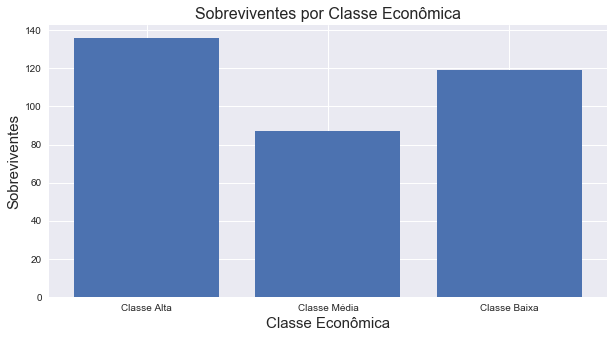

In [39]:
locations = df_surv.groupby('Pclass').count().index
values = df_surv.groupby('Pclass').count()['Survived']

sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(locations, values)
ax.set_title('Sobreviventes por Classe Econômica', fontsize=16)
plt.xticks([1, 2, 3], ['Classe Alta', 'Classe Média', 'Classe Baixa'])
ax.set_xlabel('Classe Econômica', fontsize=15)
ax.set_ylabel('Sobreviventes', fontsize=15)
plt.show()

Ideia: agrupar por classe e plotar outros parâmetros em forma de barra (semelhante ao gráfico do wine)

In [44]:
sex_counts = df.groupby(['Sex', 'Pclass']).count()['Name']
sex_counts

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Name, dtype: int64

In [48]:
class_total = df.groupby('Pclass').count()['Name']
class_total

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

In [51]:
man_prop = sex_counts['male'] / class_total
man_prop

Pclass
1    0.564815
2    0.586957
3    0.706721
Name: Name, dtype: float64

In [53]:
fem_prop = sex_counts['female'] / class_total
fem_prop

Pclass
1    0.435185
2    0.413043
3    0.293279
Name: Name, dtype: float64

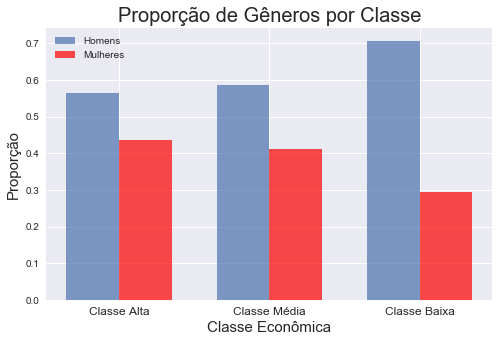

In [79]:
sex_counts = df.groupby(['Sex', 'Pclass']).count()['Name']
class_total = df.groupby('Pclass').count()['Name']
man_prop = sex_counts['male'] / class_total
fem_prop = sex_counts['female'] / class_total

ind = np.arange(len(man_prop))
width = .35

fig, ax = plt.subplots(figsize=(8, 5))
man_bar = plt.bar(ind, man_prop, width, alpha=.7, label='Homens')
fem_bar = plt.bar(ind+width, fem_prop, width, color='r', alpha=.7, label='Mulheres')
plt.ylabel('Proporção', fontsize=15)
plt.xlabel('Classe Econômica', fontsize=15)
plt.title('Proporção de Gêneros por Classe', fontsize=20)
locations = ind + width / 2
labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
plt.xticks(locations, labels, fontsize=12)
plt.legend()
plt.show()

In [82]:
surv_counts = df.groupby(['Survived', 'Pclass']).count()['Name']
surv_counts

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Name, dtype: int64

In [85]:
class_total = df.groupby('Pclass').count()['Name']
class_total

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

In [87]:
s_prop = surv_counts[1] / class_total
s_prop

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Name, dtype: float64

In [91]:
v_prop = surv_counts[0] / class_total
v_prop

Pclass
1    0.370370
2    0.527174
3    0.757637
Name: Name, dtype: float64

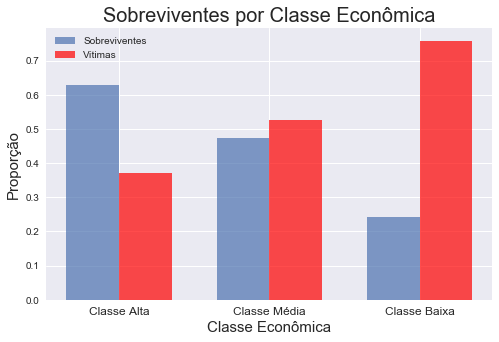

In [93]:
surv_counts = df.groupby(['Survived', 'Pclass']).count()['Name']
class_total = df.groupby('Pclass').count()['Name']
s_prop = surv_counts[1] / class_total
v_prop = surv_counts[0] / class_total

ind = np.arange(len(s_prop))
width = .35

fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, s_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, v_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção', fontsize=15)
plt.xlabel('Classe Econômica', fontsize=15)
plt.title('Sobreviventes por Classe Econômica', fontsize=20)
locations = ind + width / 2
labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
plt.xticks(locations, labels, fontsize=12)
plt.legend()
plt.show()

In [100]:
df['Age'].isnull().values.sum()

177

In [107]:
df['Age'].mean()

29.69911764705882

In [108]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [110]:
df['Age'].isnull().any()

False

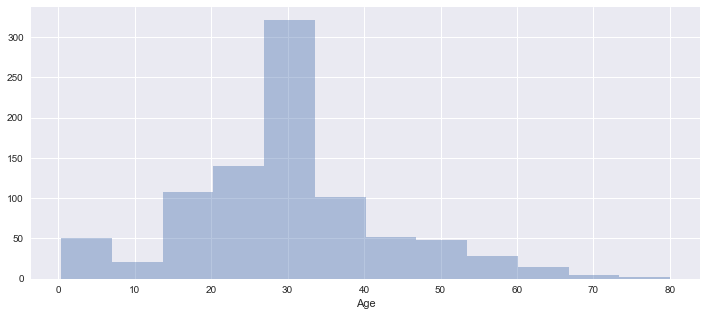

In [120]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Age'], kde=False, bins=12);

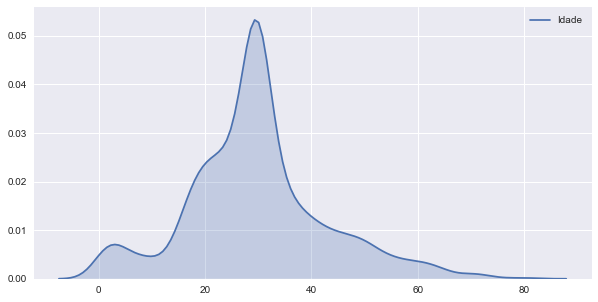

In [124]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df['Age'], shade=True, label='Idade');

In [125]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
df['Fare'].isnull().any()

False

**Investigar se houve referência entre sobreviventes e Cabines** R: Não

**Primeiro de tudo; postar gráfico de pizza com sobreviventes e vítimas**

**Realizar um CUT() com a coluna 'Fare' e dividir** / Plotar gráfico de Classe Social / Fare ou Gênero / Fare ou Survived / Fare

In [135]:
df.query('Pclass == 1')['Fare'].mean()

84.15468749999992

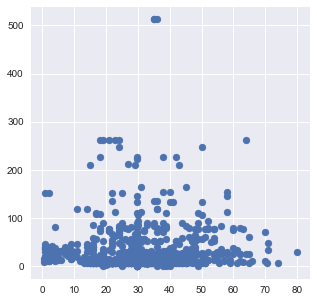

In [138]:
# Correlaçãoentre idade e Fare
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['Age'], df['Fare'])

** O que é Parch? **

In [140]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Ideia: criar tabela ou gráfico semelhante ao do Wikipedia - dividindo por idade (crianças, adultos) e classes.

https://pt.wikipedia.org/wiki/Naufr%C3%A1gio_do_RMS_Titanic#V%C3%ADtimas_e_sobreviventes

In [105]:
# Total por gênero
total_gender = df.groupby('Sex').count()['Name']
total_gender

Sex
female    314
male      577
Name: Name, dtype: int64

In [117]:
gender_proportions = df.groupby(['Sex', 'Survived']).count()['Name']
gender_proportions

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Name, dtype: int64

In [108]:
proportions = gender_survived / total_gender
proportions

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: Name, dtype: float64

In [109]:
prop_f = proportions['female']
prop_f

Survived
0    0.257962
1    0.742038
Name: Name, dtype: float64

In [110]:
prop_m = proportions['male']
prop_m

Survived
0    0.811092
1    0.188908
Name: Name, dtype: float64

In [111]:
survs = [prop_f[1], prop_m[1]]
victs = [prop_f[0], prop_m[0]]

In [112]:
survs

[0.7420382165605095, 0.18890814558058924]

In [113]:
victs

[0.25796178343949044, 0.8110918544194108]

In [151]:
survivors

[0.7420382165605095, 0.18890814558058924]

In [152]:
gender_rate

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Name, dtype: int64

In [153]:
prop_f

Survived
0    0.257962
1    0.742038
Name: Name, dtype: float64

In [156]:
(gender_rate / total_gender)['female']

Survived
0    0.257962
1    0.742038
Name: Name, dtype: float64

In [154]:
proportions

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: Name, dtype: float64

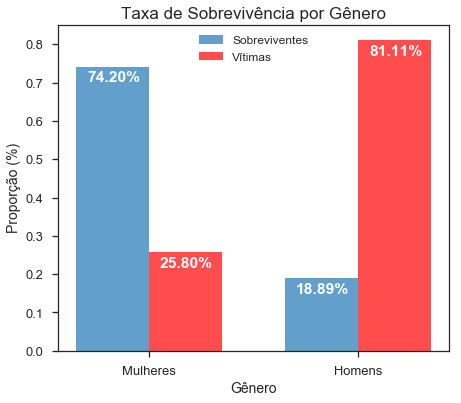

In [150]:
# Totalização por gênero
total_gender = df.groupby('Sex').count()['Name']
# Taxas de sobrevivência por gênero
gender_rate = df.groupby(['Sex', 'Survived']).count()['Name']
proportions = gender_rate / total_gender
prop_f = proportions['female']
prop_m = proportions['male']
# Proporção de sobreviventes e vítimas
survivors = [prop_f[1], prop_m[1]]
victims = [prop_f[0], prop_m[0]]

# Plotagem gráfica
ind = np.arange(len(survivors))
width = .35
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(7, 6))
m_bar = plt.bar(ind, survivors, width, alpha=.7, label='Sobreviventes')
f_bar = plt.bar(ind+width, victims, width, color='r', alpha=.7, label='Vítimas')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.title('Taxa de Sobrevivência por Gênero', fontsize=17)
locations = ind + width / 2
labels = ['Mulheres', 'Homens']
plt.xticks(locations, labels, fontsize=13)
plt.legend(fontsize=12)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (p.get_x()+.15*width, p.get_y() + height - 0.04), 
                color='w', weight='bold')
plt.show()

In [4]:
count_surv = df.groupby('Survived').count()['Name']
count_surv

Survived
0    549
1    342
Name: Name, dtype: int64

In [5]:
gender_proportions = df.groupby(['Sex', 'Survived']).count()['Name']
gender_proportions

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Name, dtype: int64

In [7]:
proportions = gender_proportions / count_surv
proportions

Sex     Survived
female  0           0.147541
        1           0.681287
male    0           0.852459
        1           0.318713
Name: Name, dtype: float64

In [8]:
prop_f = proportions['female']
prop_f

Survived
0    0.147541
1    0.681287
Name: Name, dtype: float64

In [9]:
prop_m = proportions['male']
prop_m

Survived
0    0.852459
1    0.318713
Name: Name, dtype: float64

In [10]:
survs = [prop_f[1], prop_m[1]]
victs = [prop_f[0], prop_m[0]]

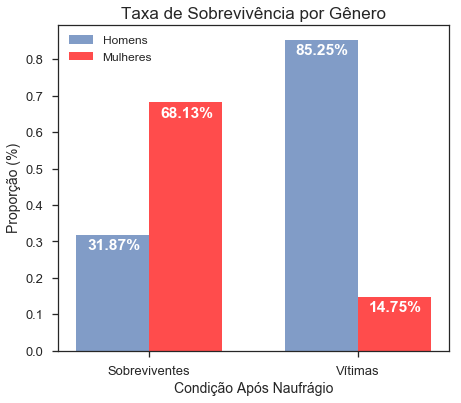

In [18]:
# Totalização por gênero
total_surv = df.groupby('Survived').count()['Name']
# Taxas de sobrevivência por gênero
gender_rate = df.groupby(['Sex', 'Survived']).count()['Name']
proportions = gender_rate / total_surv
prop_f = proportions['female']
prop_m = proportions['male']
# Proporção de sobreviventes e vítimas
survivors = [prop_f[1], prop_f[0]]
victims = [prop_m[1], prop_m[0]]

# Plotagem gráfica
ind = np.arange(len(survivors))
width = .35
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(7, 6))
m_bar = plt.bar(ind, victims, width, alpha=.7, label='Homens')
f_bar = plt.bar(ind+width, survivors, width, color='r', alpha=.7, label='Mulheres')
plt.xlabel('Condição Após Naufrágio', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.title('Taxa de Sobrevivência por Gênero', fontsize=17)
locations = ind + width / 2
labels = ['Sobreviventes', 'Vítimas']
plt.xticks(locations, labels, fontsize=13)
plt.legend(fontsize=12)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (p.get_x()+.15*width, p.get_y() + height - 0.04), 
                color='w', weight='bold')
plt.show()

In [14]:
surv_counts

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Name, dtype: int64

In [15]:
class_total

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

In [16]:
s_prop

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Name, dtype: float64

In [17]:
v_prop

Pclass
1    0.370370
2    0.527174
3    0.757637
Name: Name, dtype: float64

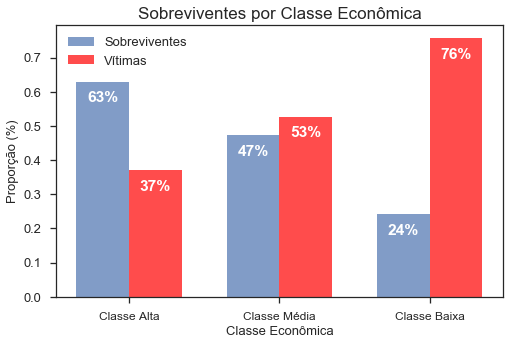

In [19]:
surv_counts = df.groupby(['Survived', 'Pclass']).count()['Name']
class_total = df.groupby('Pclass').count()['Name']
s_prop = surv_counts[1] / class_total
v_prop = surv_counts[0] / class_total

ind = np.arange(len(s_prop))
width = .35
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, s_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, v_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Classe Econômica', fontsize=13)
plt.title('Sobreviventes por Classe Econômica', fontsize=17)
locations = ind + width / 2
labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
plt.xticks(locations, labels, fontsize=12)
plt.legend()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height - 0.06), 
                color='w', weight='bold')
plt.show()

In [87]:
df.query('Age < 18').count()

PassengerId    113
Survived       113
Pclass         113
Name           113
Sex            113
Age            113
SibSp          113
Parch          113
Ticket         113
Fare           113
Cabin           19
Embarked       113
dtype: int64

In [22]:
total_surv

Survived
0    549
1    342
Name: Name, dtype: int64

In [23]:
surv_gender

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Name, dtype: int64

In [25]:
surv_class = df.groupby(['Pclass', 'Survived']).count()['Name']
surv_class

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Name, dtype: int64

In [26]:
prop_surv_1 = surv_class[1]
prop_surv_1

Survived
0     80
1    136
Name: Name, dtype: int64

In [27]:
prop_surv_m

Survived
0    468
1    109
Name: Name, dtype: int64

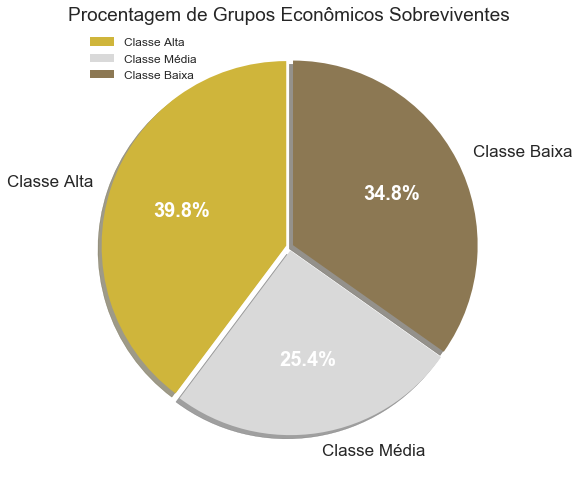

In [121]:
# Sobreviventes por classe social
surv_class = df.groupby(['Survived', 'Pclass']).count()['Name'][1]
surv_class

labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
colors = ['#CFB53B', '#d9d9d9', '#8C7853']
explode = (0.02, 0.02, 0.02)
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(surv_class, labels=labels, 
                                   startangle=90, shadow=True, explode=explode,
                                  autopct='%1.1f%%', colors=colors)
ax.set_title('Procentagem de Grupos Econômicos Sobreviventes', fontsize=19)
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.setp(autotexts, size=20, weight='bold', color='w')
plt.setp(texts, size=17)
plt.show()

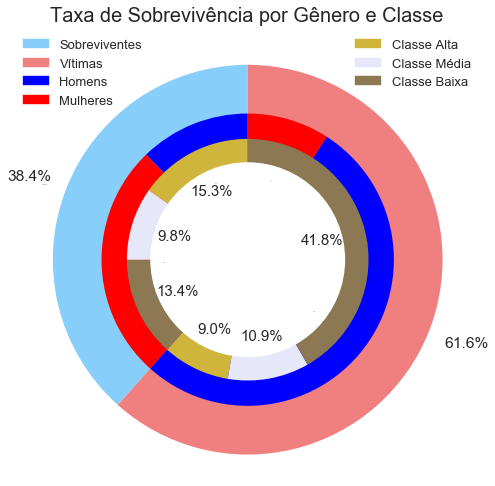

In [86]:
import matplotlib.patches as mpatches

# Número de sobreviventes e vítimas
total_surv = df.groupby('Survived').count()['Name']

# Sobreviventes por gênero
surv_gender = df.groupby(['Sex', 'Survived']).count()['Name']
prop_surv_f = surv_gender['female'] 
prop_surv_m = surv_gender['male'] 

# Sobreviventes por classe social
surv_class = df.groupby(['Pclass', 'Survived']).count()['Name']
prop_surv_1 = surv_class[1]
prop_surv_2 = surv_class[2]
prop_surv_3 = surv_class[3]

# Fatia de sobreviventes
labels = ['Sobreviventes', 'Vítimas']
sizes = [total_surv[1], total_surv[0]]

# Fatia de gêneros
labels_gender = ['Masculino', 'Feminino'] * 2
sizes_gender = [prop_surv_m[1], prop_surv_f[1], 
                prop_surv_m[0], prop_surv_f[0]]

# Fatia de classe econômica
labels_class = ['Alta', 'Média', 'Baixa'] * 2
sizes_class = [prop_surv_1[1], prop_surv_2[1], prop_surv_3[1], 
               prop_surv_1[0], prop_surv_2[0], prop_surv_3[0]]

# Definindo cores
colors = ['lightskyblue', 'lightcoral']
colors_gender = ['blue', 'red']
colors_class = ['#CFB53B', '#E6E8FA', '#8C7853']

# Criando plots
fig, ax = plt.subplots(figsize=(7, 7))

wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, startangle=90, radius=1.00,
                                   frame=True, autopct='%1.1f%%', pctdistance=1.20)
wedges_g, texts_g, autotexts_g = plt.pie(sizes_gender, colors=colors_gender, radius=0.75, 
                  autopct='%1.1f%%', pctdistance=0.57, startangle=90)
wedges_c, texts_c, autotexts_c = plt.pie(sizes_class, colors=colors_class, radius=0.62, 
                  autopct='%1.1f%%', pctdistance=0.64, startangle=90)

# Configurando especialidades do gráfico
center_circle = plt.Circle((0,0), 0.50, fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax.set_title('Taxa de Sobrevivência por Gênero e Classe', fontsize=20)
ttl = ax.title
ttl.set_position([.5, 1.05])
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')
legend_f = mpatches.Patch(color='red', label='Mulheres')
legend_m = mpatches.Patch(color='blue', label='Homens')
legend_s = mpatches.Patch(color='lightskyblue', label='Sobreviventes')
legend_v = mpatches.Patch(color='lightcoral', label='Vítimas')
legend_c1 = mpatches.Patch(color='#CFB53B', label='Classe Alta')
legend_c2 = mpatches.Patch(color='#E6E8FA', label='Classe Média')
legend_c3 = mpatches.Patch(color='#8C7853', label='Classe Baixa')

plt.legend(bbox_to_anchor=(0., 0.85, 1., .102), loc=3, 
           ncol=2, mode="expand", borderaxespad=0., 
           handles=[legend_s, legend_v, legend_m, legend_f, legend_c1, legend_c2, legend_c3])

plt.tight_layout()
plt.setp(autotexts_g, size=0)
plt.setp(autotexts_c, size=15)
plt.setp(texts, size=0)
plt.show()

Ideia, jogar a fatia de gênero para o nível mais interior possível afim de verificar os gêneros de cada classe

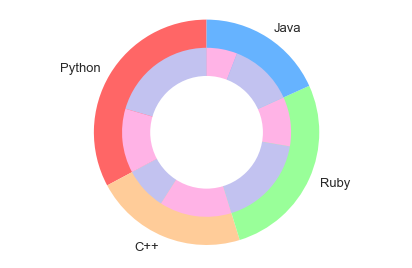

In [144]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['Python', 'C++', 'Ruby', 'Java']
sizes = [504, 337, 415, 280]
labels_gender = ['Man','Woman','Man','Woman','Man','Woman','Man','Woman']
sizes_gender = [315,189,125,212,270,145,190,90]
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited.csv')
sns.set()

In [122]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [124]:
# Informações = Idade
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited.csv')
df.set_index('PassengerId', inplace=True)
sns.set()

In [2]:
# Definindo ranges de idade
bin_edges = [df['Age'].describe()['min'], 21, 
             55, df['Age'].describe()['max']]

# Definindo labels
bin_names = ['Criança', 'Adulto', 'Idoso']

# Criando nova coluna com registros classificados por idade
df['AgeRange'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [4]:
# Verificando alterações
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Adulto
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adulto
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adulto
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adulto
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adulto
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Adulto
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Adulto
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Criança
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Adulto


In [5]:
# Filtrando para melhor visualização
df.loc[:, ['Name', 'Survived', 'Age', 'AgeRange']].head(15)

,Name,Survived,Age,AgeRange
PassengerId,,,,
1,"Braund, Mr. Owen Harris",0,22.000000,Adulto
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,Adulto
3,"Heikkinen, Miss. Laina",1,26.000000,Adulto
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,Adulto
5,"Allen, Mr. William Henry",0,35.000000,Adulto
6,"Moran, Mr. James",0,29.699118,Adulto
7,"McCarthy, Mr. Timothy J",0,54.000000,Adulto
8,"Palsson, Master. Gosta Leonard",0,2.000000,Criança
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,Adulto


In [6]:
# Verificando inconscistência
df_age_null = df[df['AgeRange'].isnull()]
df_age_null.loc[:, ['Name', 'Survived', 'Age', 'AgeRange']]

,Name,Survived,Age,AgeRange
PassengerId,,,,
804,"Thomas, Master. Assad Alexander",1,0.42,NaN


In [7]:
# Classificando manualmente e verificando
df['AgeRange'][804] = 'Criança'

print(f'Há dados nulos na coluna "AgeRange"? {df.isnull().values.any()}')
print(f'Qual a classificação do passageiro 804? {df["AgeRange"][804]}')

Há dados nulos na coluna "AgeRange"? False
Qual a classificação do passageiro 804? Criança


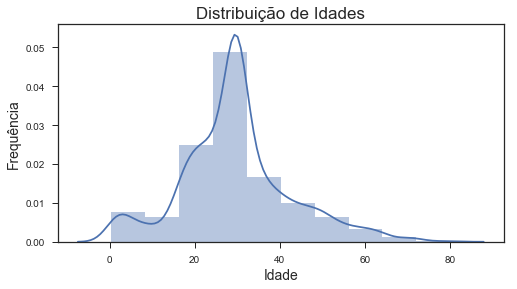

In [47]:
# Plotando distribuição de idades
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style('ticks')
sns.distplot(df['Age'], bins=10);
ax.set_title('Distribuição de Idades', fontsize=17)
ax.set_xlabel('Idade', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
plt.show()

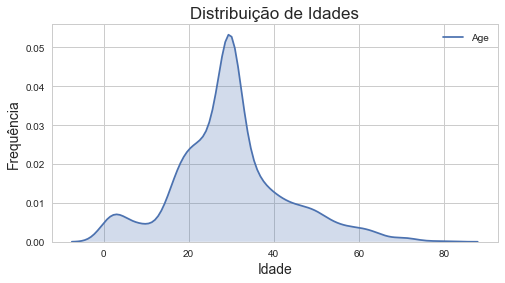

In [43]:
# Plotando distribuição de idades
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style('whitegrid')
sns.kdeplot(df['Age'], shade=True);
ax.set_title('Distribuição de Idades', fontsize=17)
ax.set_xlabel('Idade', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
plt.show()

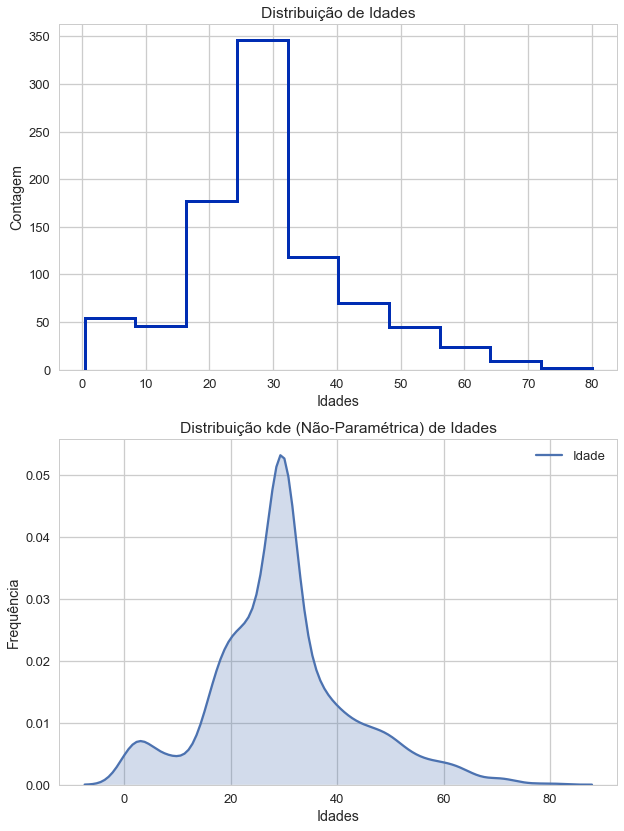

In [142]:
# Distribuição de Idades
fig, ax = plt.subplots(1, 2, figsize=(10, 14))
sns.set_context('talk')
sns.set_style('whitegrid')
# Primeiro plot = histograma
plt.subplot(211)
sns.distplot(df['Age'], kde=False, bins=10, 
             hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "#002db3"})
plt.title('Distribuição de Idades')
plt.xlabel('Idades')
plt.ylabel('Contagem')
# Segundo plot = kde
plt.subplot(212)
sns.kdeplot(df['Age'], shade=True, label='Idade')
plt.title('Distribuição kde (Não-Paramétrica) de Idades')
plt.xlabel('Idades')
plt.ylabel('Frequência')

plt.show()

In [36]:
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name']
surv_age

Survived  AgeRange
0         Criança     117
          Adulto      404
          Idoso        28
1         Criança      87
          Adulto      243
          Idoso        12
Name: Name, dtype: int64

In [176]:
age_total = df.groupby('AgeRange').count()['Name']
age_total

AgeRange
Criança    204
Adulto     647
Idoso       40
Name: Name, dtype: int64

In [177]:
age_prop = surv_age / age_total
age_prop

Survived  AgeRange
0         Criança     0.573529
          Adulto      0.624420
          Idoso       0.700000
1         Criança     0.426471
          Adulto      0.375580
          Idoso       0.300000
Name: Name, dtype: float64

In [178]:
surv_prop = age_prop[1]
vict_prop = age_prop[0]

surv_prop

AgeRange
Criança    0.426471
Adulto     0.375580
Idoso      0.300000
Name: Name, dtype: float64

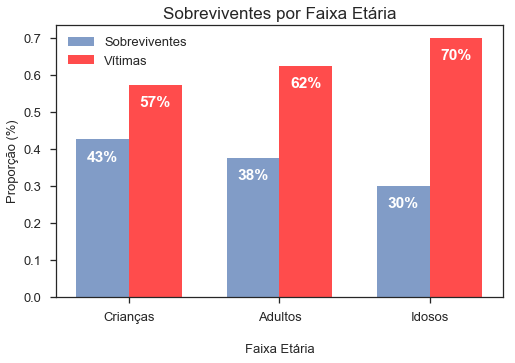

In [179]:
# Investigando Taxa de Sobrevivência por Classe Econômica

# Preparando dados
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name']
age_total = df.groupby('AgeRange').count()['Name']
age_prop = surv_age / age_total
surv_prop = age_prop[1]
vict_prop = age_prop[0]

ind = np.arange(len(surv_prop))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, surv_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, vict_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Faixa Etária', fontsize=13, labelpad=20)
plt.title('Sobreviventes por Faixa Etária', fontsize=17)
locations = ind + width / 2
labels = ['Crianças', 'Adultos', 'Idosos']
plt.xticks(locations, labels, fontsize=13)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height - 0.06), 
                color='w', weight='bold')
plt.show()

In [184]:
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name'][1]
surv_age

AgeRange
Criança     87
Adulto     243
Idoso       12
Name: Name, dtype: int64

In [181]:
v

Pclass
1    136
2     87
3    119
Name: Name, dtype: int64

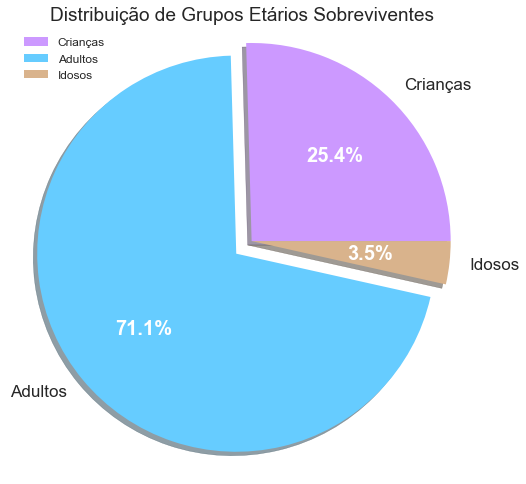

In [200]:
# Sobreviventes por classe social
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name'][1]

labels = ['Crianças', 'Adultos', 'Idosos']
colors = ['#cc99ff', '#66ccff', '#d9b38c']
explode = (0.0, 0.1, 0.0)
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(surv_age, labels=labels, 
                                   startangle=0, shadow=True, explode=explode,
                                  autopct='%1.1f%%', colors=colors)
ax.set_title('Distribuição de Grupos Etários Sobreviventes', fontsize=19)
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.setp(autotexts, size=20, weight='bold', color='w')
plt.setp(texts, size=17)
plt.show()

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited-2.csv')
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adulto
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adulto
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adulto
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adulto
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adulto


Separando df de acordo com local de embarque

In [3]:
# Chersbourg
df_c = df.query('Embarked == "C"')
df_c.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adulto
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Criança
20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,C,Adulto
27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,C,Adulto
31,0,1,"Uruchurtu, Don. Manuel E",male,40.000000,0,0,PC 17601,27.7208,C,Adulto


In [4]:
# Queenstown
df_q = df.query('Embarked == "Q"')
df_q.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Adulto
17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Q,Criança
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.000000,0,0,330923,8.0292,Q,Criança
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,Q,Adulto
33,1,3,"Glynn, Miss. Mary Agatha",female,29.699118,0,0,335677,7.7500,Q,Adulto


In [5]:
# Southampton
df_s = df.query('Embarked == "S"')
df_s.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adulto
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adulto
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adulto
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adulto
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Adulto


In [6]:
df.groupby('Embarked').count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,AgeRange
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646,646,646,646


In [7]:
# Contagem
print(f'Embarcaram em Chersbourg: {df_c.shape[0]} pessoas.')
print(f'Embarcaram em Queenstown: {df_q.shape[0]} pessoas.')
print(f'Embarcaram em Southampthon: {df_s.shape[0]} pessoas.')

Embarcaram em Chersbourg: 168 pessoas.
Embarcaram em Queenstown: 77 pessoas.
Embarcaram em Southampthon: 646 pessoas.


In [8]:
# Ticket médio
print(f'Ticket médio em Cherbourg: {df_c["Fare"].mean():.2f}')
print(f'Ticket médio em Queenstown: {df_q["Fare"].mean():.2f}')
print(f'Ticket médio em Southampthon: {df_s["Fare"].mean():.2f}')

Ticket médio em Cherbourg: 59.95
Ticket médio em Queenstown: 13.28
Ticket médio em Southampthon: 27.24


In [56]:
df.groupby(['Embarked', 'Survived']).count()['Name']

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Name, dtype: int64

In [57]:
df.groupby(['Embarked', 'Pclass']).count()['Name']

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
Name: Name, dtype: int64

In [59]:
df.groupby(['Embarked']).mean()['Age']

Embarked
C    30.562419
Q    29.113724
S    29.544382
Name: Age, dtype: float64

In [61]:
df.groupby('Pclass').mean()['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [63]:
df_c.groupby(['AgeRange']).count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
AgeRange,,,,,,,,,,
Adulto,124,124,124,124,124,124,124,124,124,124
Criança,33,33,33,33,33,33,33,33,33,33
Idoso,11,11,11,11,11,11,11,11,11,11


In [64]:
df_q.groupby(['AgeRange']).count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
AgeRange,,,,,,,,,,
Adulto,62,62,62,62,62,62,62,62,62,62
Criança,12,12,12,12,12,12,12,12,12,12
Idoso,3,3,3,3,3,3,3,3,3,3


In [65]:
df_s.groupby(['AgeRange']).count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
AgeRange,,,,,,,,,,
Adulto,461,461,461,461,461,461,461,461,461,461
Criança,159,159,159,159,159,159,159,159,159,159
Idoso,26,26,26,26,26,26,26,26,26,26


In [66]:
df.groupby(['Survived', 'Embarked']).count()

Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived Embarked                                                       
0        C             75    75   75   75     75     75      75    75   
         Q             47    47   47   47     47     47      47    47   
         S            427   427  427  427    427    427     427   427   
1        C             93    93   93   93     93     93      93    93   
         Q             30    30   30   30     30     30      30    30   
         S            219   219  219  219    219    219     219   219   

                   AgeRange  
Survived Embarked            
0        C               75  
         Q               47  
         S              427  
1        C               93  
         Q               30  
         S              219

In [68]:
df.groupby('Embarked').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144
Q,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030
S,0.339009,2.346749,29.544382,0.569659,0.411765,27.243651


In [70]:
df.groupby('Embarked').count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,AgeRange
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646,646,646,646


In [113]:
count_class_emb = df.groupby(['Embarked', 'Pclass']).count()['Name']
count_class_emb

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
Name: Name, dtype: int64

In [76]:
totals = df.groupby('Embarked').count()['Name']
totals

Embarked
C    168
Q     77
S    646
Name: Name, dtype: int64

In [77]:
count_class_emb / totals

Embarked  Pclass
C         1         0.505952
          2         0.101190
          3         0.392857
Q         1         0.025974
          2         0.038961
          3         0.935065
S         1         0.199690
          2         0.253870
          3         0.546440
Name: Name, dtype: float64

In [80]:
count_class_gen = df.groupby(['Embarked', 'Sex']).count()['Name']
count_class_gen

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    205
          male      441
Name: Name, dtype: int64

In [81]:
count_class_gen / totals

Embarked  Sex   
C         female    0.434524
          male      0.565476
Q         female    0.467532
          male      0.532468
S         female    0.317337
          male      0.682663
Name: Name, dtype: float64

In [86]:
age_count = df.groupby(['Embarked', 'AgeRange']).count()['Name']
age_count

Embarked  AgeRange
C         Adulto      124
          Criança      33
          Idoso        11
Q         Adulto       62
          Criança      12
          Idoso         3
S         Adulto      461
          Criança     159
          Idoso        26
Name: Name, dtype: int64

In [83]:
age_count / totals

Embarked  AgeRange
C         Adulto      0.738095
          Criança     0.196429
          Idoso       0.065476
Q         Adulto      0.805195
          Criança     0.155844
          Idoso       0.038961
S         Adulto      0.713622
          Criança     0.246130
          Idoso       0.040248
Name: Name, dtype: float64

In [ ]:
def stats_bay(bay):
    """
    Função que imprime uma série de análises estatísticas de acordo com porto de entrada passado como argumento.
    
    INPUT: bay - porto ('C', 'S' ou 'Q')
    """

In [90]:
df.groupby('Embarked').count()['Name']

Embarked
C    168
Q     77
S    646
Name: Name, dtype: int64

In [100]:
df.groupby('Embarked').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144
Q,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030
S,0.339009,2.346749,29.544382,0.569659,0.411765,27.243651


In [115]:
p_class_emb = df.groupby(['Embarked', 'Pclass']).count()['Name']
p_class_emb

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
Name: Name, dtype: int64

In [117]:
contagem = df.groupby('Embarked').count()['Name']
contagem

Embarked
C    168
Q     77
S    646
Name: Name, dtype: int64

In [120]:
t = 100 * p_class_emb['C'] / contagem['C']
t

Pclass
1    50.595238
2    10.119048
3    39.285714
Name: Name, dtype: float64

In [121]:
t[1]

50.595238095238095

In [137]:
surv_emb = df.groupby(['Embarked', 'Survived']).count()['Name']
surv_emb

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Name, dtype: int64

In [138]:
surv_emb / totals

Embarked  Survived
C         0           0.446429
          1           0.553571
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Name, dtype: float64

In [143]:
def stats_bay(bay):
    bay = bay.strip().upper()
    
    contagem = df.groupby('Embarked').count()['Name']
    medias = df.groupby('Embarked').mean()
    p_class_emb = df.groupby(['Embarked', 'Pclass']).count()['Name']
    prop_class = 100 *  p_class_emb[bay] / contagem[bay]
    gender_emb = df.groupby(['Embarked', 'Sex']).count()['Name']
    prop_gender = 100 * gender_emb[bay] / contagem[bay]
    agerange_emb = df.groupby(['Embarked', 'AgeRange']).count()['Name']
    prop_agerange = 100 * agerange_emb[bay] / contagem[bay]
    surv_emb = df.groupby(['Embarked', 'Survived']).count()['Name']
    prop_surv = 100 * surv_emb[bay] / contagem[bay]
   
    if bay == 'C':
        bay_name = 'Cherbourg'
    elif bay == 'S':
        bay_name = 'Southampton'
    else:
        bay_name = 'Queenstown'

    print(f'- - - DADOS DE {bay_name.upper()} - - -')
    print(f'Total de passageiros com embarque em {bay_name}: {contagem[bay]} pessoas.')
    print(f'Idade média dos passageiros de {bay_name}: {medias["Age"][bay]:.2f} anos.')
    print(f'Ticket médio dos passageiros de {bay_name}: ${medias["Fare"][bay]:.2f}')
    print()
    print('- - - CLASSE ECONÔMICA - - -')
    print(f'Porcentagem de Classe Alta que embarcaram em {bay_name}: {prop_class[1]:.2f}%')
    print(f'Porcentagem de Classe Média que embarcaram em {bay_name}: {prop_class[2]:.2f}%')
    print(f'Porcentagem de Classe Baixa que embarcaram em {bay_name}: {prop_class[3]:.2f}%')
    print()
    print('- - - GÊNERO - - -')
    print(f'Porcetagem de Homens que embarcaram em {bay_name}: {prop_gender["male"]:.2f}%')
    print(f'Porcetagem de Mulheres que embarcaram em {bay_name}: {prop_gender["female"]:.2f}%')
    print()
    print('- - - FAIXA ETÁRIA - - -')
    print(f'Porcentagem de Crianças que embarcaram em {bay_name}: {prop_agerange["Criança"]:.2f}%')
    print(f'Porcentagem de Adultos que embarcaram em {bay_name}: {prop_agerange["Adulto"]:.2f}%')
    print(f'Porcentagem de Idosos que embarcaram em {bay_name}: {prop_agerange["Idoso"]:.2f}%')
    print()
    print('- - - PROBABILIDADE DE SOBREVIVÊNCIA - - -')
    print(f'Probabilidade de sobrevivência para embarcantes em {bay_name}: {prop_surv[1]:.2f}%')

In [144]:
stats_bay('s')

- - - DADOS DE SOUTHAMPTON - - -
Total de passageiros com embarque em Southampton: 646 pessoas.
Idade média dos passageiros de Southampton: 29.54 anos.
Ticket médio dos passageiros de Southampton: $27.24

- - - CLASSE ECONÔMICA - - -
Porcentagem de Classe Alta que embarcaram em Southampton: 19.97%
Porcentagem de Classe Média que embarcaram em Southampton: 25.39%
Porcentagem de Classe Baixa que embarcaram em Southampton: 54.64%

- - - GÊNERO - - -
Porcetagem de Homens que embarcaram em Southampton: 68.27%
Porcetagem de Mulheres que embarcaram em Southampton: 31.73%

- - - FAIXA ETÁRIA - - -
Porcentagem de Crianças que embarcaram em Southampton: 24.61%
Porcentagem de Adultos que embarcaram em Southampton: 71.36%
Porcentagem de Idosos que embarcaram em Southampton: 4.02%

- - - PROBABILIDADE DE SOBREVIVÊNCIA - - -
Probabilidade de sobrevivência para embarcantes em Southampton: 33.90%


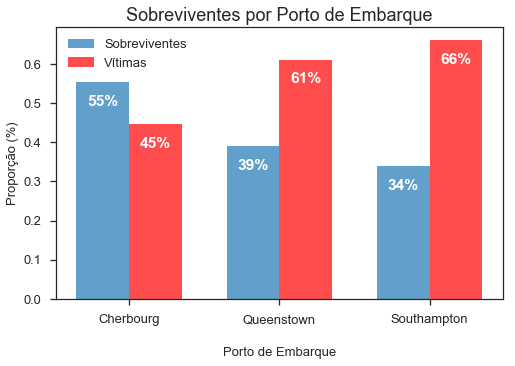

In [152]:
# Preparando dados
surv_emb = df.groupby(['Survived', 'Embarked']).count()['Name']
emb_total = df.groupby('Embarked').count()['Name']
emb_prop = surv_emb / emb_total
surv_prop = emb_prop[1]
vict_prop = emb_prop[0]

ind = np.arange(len(emb_prop[1]))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, surv_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, vict_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Porto de Embarque', fontsize=13, labelpad=20)
plt.title('Sobreviventes por Porto de Embarque', fontsize=18)
locations = ind + width / 2
labels = ['Cherbourg', 'Queenstown', 'Southampton']
plt.xticks(locations, labels, fontsize=13)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height - 0.06), 
                color='w', weight='bold')
plt.show()

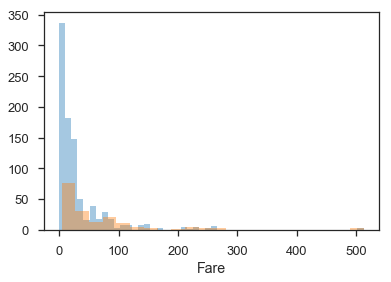

In [158]:
sns.distplot(df['Fare'], kde=False)
sns.distplot(df.query('Embarked == "C"')['Fare'], kde=False)

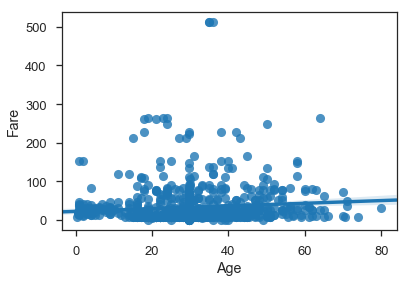

In [160]:
sns.regplot(df['Age'], df['Fare'])

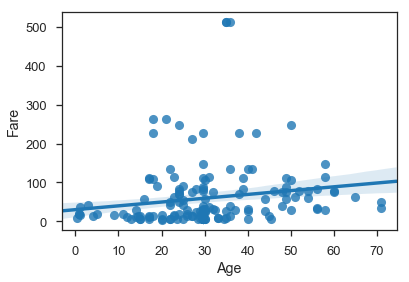

In [164]:
sns.regplot(df_c['Age'], df_c['Fare'])

In [166]:
surv_prop

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Name, dtype: float64

In [167]:
emb_prop

Survived  Embarked
0         C           0.446429
          Q           0.610390
          S           0.660991
1         C           0.553571
          Q           0.389610
          S           0.339009
Name: Name, dtype: float64

In [170]:
pclass_emb = df.groupby(['Pclass', 'Embarked']).count()['Name']
pclass_emb

Pclass  Embarked
1       C            85
        Q             2
        S           129
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Name, dtype: int64

In [171]:
emb_total = df.groupby('Embarked').count()['Name']
emb_total

Embarked
C    168
Q     77
S    646
Name: Name, dtype: int64

In [172]:
emb_prop = pclass_emb / emb_total
emb_prop

Pclass  Embarked
1       C           0.505952
        Q           0.025974
        S           0.199690
2       C           0.101190
        Q           0.038961
        S           0.253870
3       C           0.392857
        Q           0.935065
        S           0.546440
Name: Name, dtype: float64

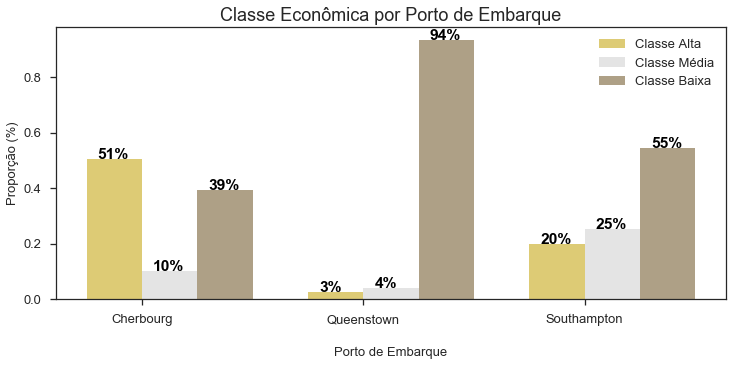

In [215]:
# Agrupamento de Classe Econômica por Porto de Embarque
pclass_emb = df.groupby(['Pclass', 'Embarked']).count()['Name']

# Contagem total por Porto
emb_total = df.groupby('Embarked').count()['Name']

# Proporção de Classe Econômica por Porto
emb_prop = pclass_emb / emb_total
high_class = emb_prop[1]
medium_class = emb_prop[2]
low_class = emb_prop[3]

# Configurando barras e figure
ind = np.arange(len(high_class))
width = .25
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
handles = []
fig, ax = plt.subplots(figsize=(12, 5))
high_bar = plt.bar(ind, high_class, width, color='#CFB53B', alpha=.7, label='Classe Alta')
handles.append(high_bar)
medium_bar = plt.bar(ind+width, medium_class, width, color='#d9d9d9', alpha=.7, label='Classe Média')
low_bar = plt.bar(ind+2*width, low_class, width, color='#8C7853', alpha=.7, label='Classe Baixa')

plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Porto de Embarque', fontsize=13, labelpad=20)
plt.title('Classe Econômica por Porto de Embarque', fontsize=18)
locations = ind + width / 2
labels = ['Cherbourg', 'Queenstown', 'Southampton']
plt.xticks(locations, labels, fontsize=13)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height + 0.00), 
                color='black', weight='bold')

plt.show()